# StackOverflow Surveys Info
## Tech Understanding and Trends

### Table of Contents

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling and Visualization
5. Evaluation

## 1. Business Understanding

This notebook contains the analytics for the 2020 and previous years of the Stackoverflow Survey and the insights of some users that are focused on Data Science and Machine Learning topics

1. About the Gender Gap within Data Science enviroment: How is the Gender Proportion in this survey? Do women answer the same than men?
2. Which are the countries with more Data Scientist & Machine Learning programmers? -at least between those who have answered this survey?- and what about DS&ML women?
3. Which Programming Language is the most popular? and which is the favourite  between women, according to the survey?
4. What is the best way for code sharing?
5. How well can we predict an individual's job satisfaction? What aspects correlate well to job satisfaction?



## 2. Data Understanding

### First of all we need to import the libraries we need

In [1]:
# Import Packages we need:
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
# module to manage with files and directories
import glob 
#collection of functions 
import matplotlib.pyplot as plt 
# linear algebra
import numpy as np 
# library for making statistical graphics
import seaborn as sns 
# Squarify graphics library need installation: pip install squarify (algorithm for treemap)
import squarify
import warnings
import random
# Some functions to make plots with Plotly
import plotly.graph_objs as go
from plotly import tools
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py

import pycountry # need to install

# for ML tasks
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score

init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Gather necessary data to answer the questions
# We load the data and
# import the csv files as dataframes

df_survey_orig = pd.read_csv("./input/2020/survey_results_public.csv",header=0)

# but keep them independently
questions = df_survey_orig.iloc[0]
df_survey_orig_schema = pd.read_csv("./input/2020/survey_results_schema.csv",header=0)

# Load 2019 Stackoverfow survey
df_2019_s_survey = pd.read_csv("./input/2019/survey_results_public.csv",header=0)

# Load 2018 Stackoverfow survey
df_2018_s_survey = pd.read_csv("./input/2018/survey_results_public.csv",header=0)

df = df_survey_orig

In [3]:
# There are 61 columns (61 questions) and 64460 answers (almost 65K)
df.shape

(64461, 61)

In [4]:
# Let's take a look at the header of the file
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

We can see that not all questions have been answered

## 3. Data Preparation

In [5]:
# Now let's see if there is NaNs in the dataset, that means questions not answered
df.isnull().sum()

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

In [6]:
# Let's see some statistics
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


Let's see the questions of the 2020 survey

In [7]:
df_survey_orig_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


Now, let's have a Global Overview of the Respondent's Countries

In [8]:
# We prepare the occurrences of each country and colour each country with a lighter or deeper blue them depending on that occurrences
countries = df['Country'].value_counts()

countries = countries.to_frame().reset_index()
countries.loc[2]['code'] = 'test'
for i,country in enumerate(countries['index']):
    user_input = country
    mapping = {country.name: country.alpha_3 for country in pycountry.countries}
    countries.loc[i, 'code'] = mapping.get(user_input)
data = [ dict(
        type = 'choropleth',
        locations = countries['code'],
        z = countries['Country'],
        text = countries['index'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Total Count'),
      ) ]

layout = dict(
    title = 'Countries that responded to the 2020 StackOverflow survey',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False)

# Insights Part 1

# Q1. Let's see the proportion of Gender on this survey

An image worths thousand words, so we are going to prepare one:

In [9]:
# Let's count separately by gender
gender_df_count = pd.DataFrame(df["Gender"].value_counts())
gender_df_count = gender_df_count.reset_index(drop=False)
gender_df_count.columns = ["Gender","Count"]

In [10]:
# and plot with a bar
fig = px.bar(
    gender_df_count, 
    x='Count', 
    y="Gender", 
    orientation='h', 
    title='2020 StackOverflow Gender distribution', 
    width=800,
    height=400 
)

fig.show()

There are few women compare to man, let's see if this trend happened in the past with other surveys

Let's compare the gender proportion of this survey and year with the results of the 2018, 2019 of Stackoverflow

But before that, let's make only three gender groups: Man, Woman and Others

In [11]:
# As there is a lot of different "Other" Gender
# Prepare the data for visualize better the Gender on the Statistics graphic
gender_dict = {"Nonbinary": "Others", 
               "Prefer not to say": "Others",
               "Prefer to self-describe": "Others",
               "Non-binary, genderqueer, or gender non-conforming": "Others",     
               "Woman;Non-binary, genderqueer, or gender non-conforming": "Others",               
               "Man;Non-binary, genderqueer, or gender non-conforming": "Others",
               "Woman;Man": "Others",
               "Woman;Man;Non-binary, genderqueer, or gender non-conforming": "Others",
               "What is your gender? - Selected Choice": "Others",
               "Male": "Man",
               "Female": "Woman",
               "Female;Transgender": "Others",
               "Male;Non-binary, genderqueer, or gender non-conforming": "Others",
               "Female;Transgender": "Others",
               "Male;Non-binary, genderqueer, or gender non-conforming": "Others",
               "Transgender": "Others",
               "Female;Male": "Others",
               "Transgender;Non-binary, genderqueer, or gender non-conforming": "Others",
               "Female;Male;Transgender;Non-binary, genderqueer": "Others",
               "Female;Non-binary, genderqueer, or gender non-conforming": "Others",               
               "Male;Transgender": "Others",
               "Female;Transgender;Non-binary, genderqueer, or gender non-conforming":"Others",
               "Female;Male;Transgender":"Others",
               "Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Others",
               "Female;Male;Non-binary, genderqueer, or gender non-conforming":"Others",
               "Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Others"
               
              }
df["Gender"] = df["Gender"].replace(gender_dict)
df_2019_s_survey["Gender"] = df_2019_s_survey["Gender"].replace(gender_dict)
df_2018_s_survey["Gender"] = df_2018_s_survey["Gender"].replace(gender_dict)

In [12]:
#Prepare the data for visualize the Statistics graphic

gender_df_count = pd.DataFrame(df["Gender"].value_counts())
gender_df_count = gender_df_count.reset_index(drop=False)
gender_df_count.columns = ["Gender","Count"]

gender_2020_s_df_count = pd.DataFrame(df["Gender"].value_counts())
gender_2020_s_df_count = gender_2020_s_df_count.reset_index(drop=False)
gender_2020_s_df_count.columns = ["Gender","Count"]

gender_2019_s_df_count = pd.DataFrame(df_2019_s_survey["Gender"].value_counts())
gender_2019_s_df_count = gender_2019_s_df_count.reset_index(drop=False)
gender_2019_s_df_count.columns = ["Gender","Count"]

gender_2018_s_df_count = pd.DataFrame(df_2018_s_survey["Gender"].value_counts())
gender_2018_s_df_count = gender_2018_s_df_count.reset_index(drop=False)
gender_2018_s_df_count.columns = ["Gender","Count"]

In [13]:
gender_df_count

,Gender,Count
0,Man,46013
1,Woman,3844
2,Others,700


In [14]:
gender_2019_s_df_count

,Gender,Count
0,Man,77919
1,Woman,6344
2,Others,1143


In [15]:
gender_2018_s_df_count

,Gender,Count
0,Man,59458
1,Woman,4025
2,Others,986


In [16]:
# We get the numbers from the previous years' surveys
# And present them with a stack bar plot
x=gender_df_count['Gender']
x_c=gender_2019_s_df_count['Gender']
x_d=gender_2018_s_df_count['Gender']

trace3 = {
  'x': x_d,
  'y': gender_2018_s_df_count['Count'],
  'name': '2018 StackOverflow Survey',
  'type': 'bar',
  'marker_color':'rgb(55, 83, 109)'
};
trace2 = {
  'x': x_c,
  'y': gender_2019_s_df_count['Count'],
  'name': '2019 StackOverflow Survey',
  'type': 'bar',
  'marker_color':'rgb(69,117,180)'
};
trace1 = {
  'x': x,
  'y': gender_df_count['Count'],
  'name': '2020 StackOverflow Survey',
  'type': 'bar',
  'marker_color':'rgb(116,173,209)'
  
};


data = [trace3, trace2, trace1];
layout = {
  'xaxis': {'title': 'Gender Distribution'},
  'barmode': 'relative',
  'title': 'Distribution of Gender on 2018, 2019 and 2020 StackOverflow statistics '
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

We can confirm there are much more men than women, at least answering this kind of surveys

Now we can answer the second question: 

# Q2. Which are the countries with more Data Scientist & Machine Learning programmers? -at least between those who have answered this survey?-

First, let's select only the Data Scientist and Machine Learning Engineers from all the respondents

In [17]:
# Select the roles Data Scientist or Machine Learning Engineer
ds = df[(df['DevType']=='Data scientist or machine learning specialist')]

Let's order by the frequency of Countries

In [18]:
# And now select by country
dscountry = ds['Country'].value_counts().reset_index()
dscountry = dscountry.sort_values(['Country'])
dscountry.columns = [
    'country', 
    'counts']

Which are the two top Countries with more Data Scientist and ML specialists?

In [19]:
# Let's print the two countries with more Data Scientist or Machine Learning specialists
dscountry[-2:]

,country,counts
1,India,54
0,United States,83


The country with more Data Scientist and ML Engineers is United States, followed by India.
But let's see all countries and its number of Data specialist

In [20]:
# And Let's see all the Data Scientist and Machine Learning Engineers all over the world (that has responded this survey)
dscountry

,country,counts
56,New Zealand,1
40,Bulgaria,1
41,Latvia,1
43,Iceland,1
44,Nepal,1
45,Costa Rica,1
46,Romania,1
47,Oman,1
42,Tunisia,1
49,Chile,1


There are a lot of countries with only one occurrency, so let's keep them out...

In [21]:
# Let's visualize the countries that have more than one Data Scientist or ML specialist
top_country = dscountry[dscountry.counts>1]
top_country = top_country.sort_values(['counts'])
top_country.columns = [
    'country', 
    'counts']
top_country

,country,counts
39,Iran,2
27,Ukraine,2
26,Singapore,2
28,Pakistan,2
37,South Africa,2
29,South Korea,2
31,Portugal,2
30,Morocco,2
33,Austria,2
34,Indonesia,2


And now we should shorten some long names of countries so that the graphic will be nice formated

In [22]:
#Prepare the data for visualize better the Country name on the Statistics graphic
country_dict = {"Russian Federation": "Russia", 
               "Republic of Korea": "Korea",
               "Hong Kong (S.A.R.)": "Hong Kong"              
              }

top_country["country"] = top_country["country"].replace(country_dict)
dscountry["country"] = dscountry["country"].replace(country_dict)
ds["Country"] = ds["Country"].replace(country_dict)

df["Country"] = df["Country"].replace(country_dict)
df_2019_s_survey["Country"] = df_2019_s_survey["Country"].replace(country_dict)
df_2018_s_survey["Country"] = df_2018_s_survey["Country"].replace(country_dict)

In [23]:
# Let's see this top countries
top_country

,country,counts
39,Iran,2
27,Ukraine,2
26,Singapore,2
28,Pakistan,2
37,South Africa,2
29,South Korea,2
31,Portugal,2
30,Morocco,2
33,Austria,2
34,Indonesia,2


And now we would like to see them on a nice plot

In [24]:
# So let's print them with an horizontal bar
fig = px.bar(
    top_country, 
    x='counts', 
    y="country", 
    orientation='h', 
    title='Distribution of Data Scientist & Machine Learning Specialists by Country', 
    width=900,
    height=900 
)

fig.show()

And what about a heatmap to see the same information? It's another way to see this information more compacted

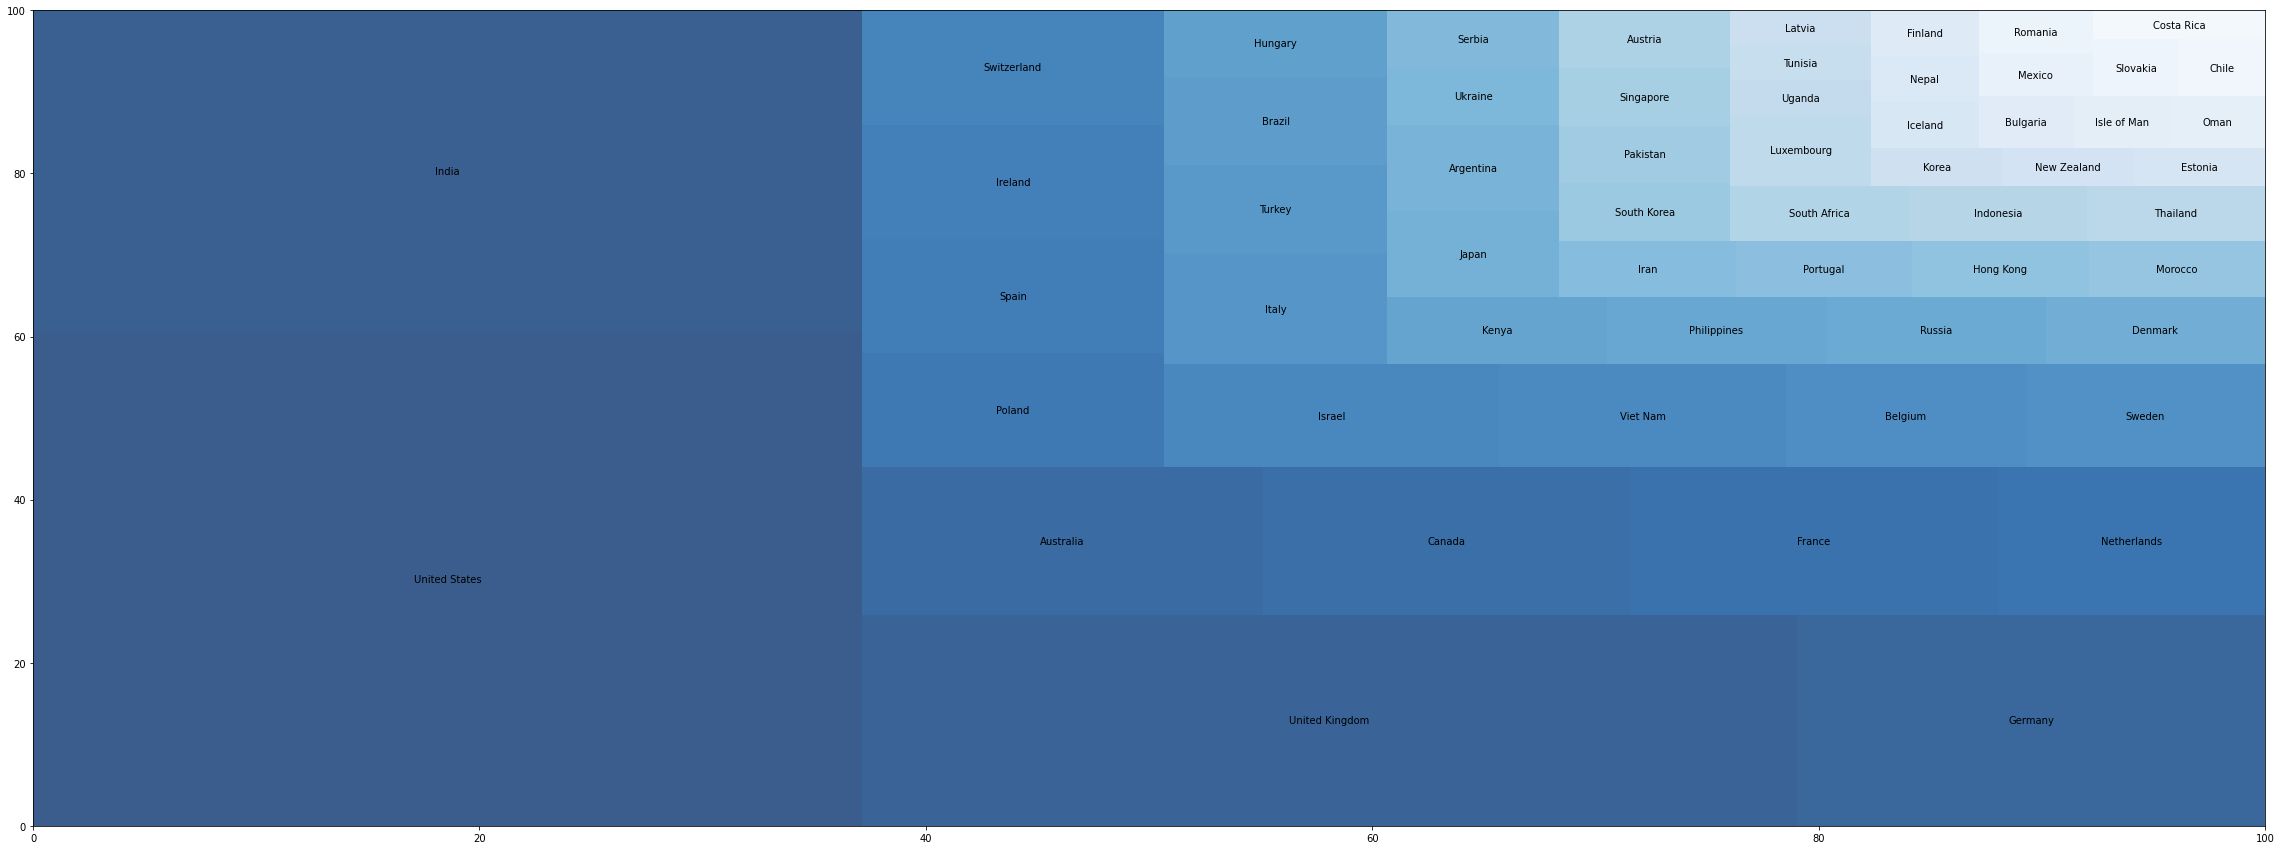

In [25]:
# Let's show the same information with a heatmap
tree=ds['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values,label=tree.index,color=sns.color_palette("Blues_r",58),alpha=.8)

plt.rcParams.update({'font.size':22})
fig=plt.gcf()
fig.set_size_inches(40,15)
plt.show()

Now let's see how many Data Scientist or Machine Learning Engineer Women have responded this survey...
Really few... In USA only 16 

In [26]:
# Let's prepare a Dataframe with only the Data Scientist or Machine Learning specialists that are women
dscountry = df[((df['DevType']=='Data scientist or machine learning specialist') & (df['Gender']=='Woman'))]
dscountry = dscountry.value_counts('Country').reset_index()
dscountry = dscountry.sort_values(['Country'])
dscountry.columns = [
    'country', 
    'counts']
dscountry = dscountry.sort_values(['counts'])

In [27]:
# And visualize with a plot bar
fig = px.bar(
    dscountry, 
    x='counts', 
    y="country", 
    orientation='h', 
    title='Country distribution per Woman and Data Scientist/Machine Learning Engineer', 
    width=1000,
    height=1000 
)

fig.show()

Funny! Now let's go to the third question: 


# Q3. Which Programming Language is the most popular? and which is the favourite  between women, according to the survey?

Let's find out the Programming languages:

In [28]:
# Let's prepare a new Dataframe that contains the information about the Programming Language that developers are working with
# and its country
new_df = df[['LanguageWorkedWith','Country']]

In [29]:
# Now we drop the na entries
# We could impute with a value, but we would be masking the reality...
new_df.dropna(inplace = True)
new_df

lang_list = []
for each in list(new_df['LanguageWorkedWith'].value_counts().index):
    splited = each.split(";")
    for each in splited:
        lang_list.append(each)
lang_list = list(set(lang_list))


In [30]:
# We save the top countries in a list
top_country_list = top_country.country

We need a function to separate the languages, as they are given all together separated by semicolons....

In [31]:
# We the language by country. Languages are separated by semicolons so we need to split them...
# And calculate the percentage

def get_language_country(df, col_country, col_lang, top_country ):    
        
    '''
    INPUT:
    df - Dataframe
    col_country - Column name in df (as string) where the countries are stored
    col_lang - Language column in df (as string) where the languages are stored

    
    OUTPUT:
    sorted_lang_country_table: Overal currently worked languages per country sorted as descending (as Series)
    lang_list:    A list containing unique languages
    
    '''
    
    # create new df
    new_df = df[[col_country,col_lang]]
   # print (new_df)
        # dropp na
    new_df.dropna(inplace = True)    
    #print (new_df)
    
    # create list for separated languages
    lang_list = []
    for each in list(new_df[col_lang].value_counts().index):
        splited = each.split(";")
        for each in splited:
            lang_list.append(each)
    lang_list = list(set(lang_list))
   # print (lang_list)
    
    # Arranging LanguageWorkedWith column by
    # seperating into several columns
    for lang in lang_list:

        new_df[lang] = new_df[col_lang].str.split(";")
        new_df[lang] = [lang in row for row in new_df[lang]]
        new_df[lang] = new_df[lang].astype(int).replace({False: 0, True: 1})

    sorted_lang_list_table= new_df.iloc[:,2:].mean().sort_values(ascending = False)

    
    # print (new_df)
    # Sorting languages descending and creating new list
    sorted_lang_list = new_df.iloc[:,2:].mean().sort_values(ascending = False).index
    #print (sorted_lang_list)
    
    
    # Creating series for language statistics of each country
    # and creating df from those series
    series_list = []
    for country in top_country:
        #print (country)
        country_lang_percent = new_df[new_df.Country == country].iloc[:,2:].mean().reindex(sorted_lang_list)
       # print (country_lang_percent)
        series_list.append(country_lang_percent)
   
    country_lang_percent_df = pd.concat(series_list, axis = 1)
    country_lang_percent_df.columns = top_country
    country_lang_percent_df = country_lang_percent_df.transpose()
    
    country_lang_percent= country_lang_percent.transpose()
    #print (country_lang_percent)
    
    return sorted_lang_list_table, country_lang_percent_df, sorted_lang_list   


In [32]:
# We sort the percentages of the top countries
sorted_lang_percent_table, country_lang_percent_df, lang_list = get_language_country(new_df, "Country", "LanguageWorkedWith",top_country_list)

In [33]:
# We show the percentages of the top countries
sorted_lang_percent_table

JavaScript               0.676601
HTML/CSS                 0.630573
SQL                      0.547475
Python                   0.440709
Java                     0.402140
Bash/Shell/PowerShell    0.330789
C#                       0.314424
PHP                      0.261546
TypeScript               0.254070
C++                      0.238889
C                        0.217627
Go                       0.087804
Kotlin                   0.077870
Ruby                     0.070515
Assembly                 0.061923
VBA                      0.060982
Swift                    0.059204
R                        0.057304
Rust                     0.051047
Objective-C              0.040782
Dart                     0.039736
Scala                    0.035763
Perl                     0.031301
Haskell                  0.021297
Julia                    0.009045
dtype: float64

In [34]:
# We show the percentage of the 5 most used programming languages of countries
country_lang_percent_df.iloc[:,:5]

,JavaScript,HTML/CSS,SQL,Python,Java
country,,,,,
Iran,0.705336,0.658933,0.531323,0.408353,0.334107
Ukraine,0.630802,0.527426,0.468354,0.333333,0.293249
Singapore,0.694175,0.597087,0.538835,0.480583,0.446602
Pakistan,0.690202,0.701729,0.540346,0.354467,0.422190
South Africa,0.688341,0.677130,0.621076,0.354260,0.358744
South Korea,0.575581,0.470930,0.412791,0.453488,0.482558
Portugal,0.727273,0.633609,0.556474,0.404959,0.407713
Morocco,0.731034,0.765517,0.655172,0.462069,0.531034
Austria,0.654224,0.646365,0.561886,0.402750,0.524558


In [35]:
# Let's plot this info with a nice graphic 
fig = px.bar(
    country_lang_percent_df.iloc[:,:5], 
  #  x='Languages', 
  #  y="Percentage", 
    orientation='h', 
    title='Top 5 Used Programming Languages -Percentage- ', 
    width=900,
    height=900 
)

fig.show()

The Top 5 programming languages that respondents are working with are:
JavaScript, HTML/CSS, SQL, Python and Java

And which are the programming languages that women are working with?

In [36]:
# Now we want to show the languages women use the most 
# To do that we prepare a dataframe that contains only the information of women
# After that, based on that Dataframe, we select the Language and Country
# And we calculate the percentages with the same function
df_women = df[df['Gender']=='Woman']
df_women = df_women[['LanguageWorkedWith','Country']]
sorted_lang_percent_table, country_lang_percent_df_w, lang_list_w = get_language_country(df_women , "Country", "LanguageWorkedWith",top_country_list)

In [37]:
# Let's plot those results with a nice graphic 
fig = px.bar(
    country_lang_percent_df_w.iloc[:,:5], 
  #  x='Languages', 
  #  y="Percentage", 
    orientation='h', 
    title='Top 5 Used Programming Languages for Women -Percentage- ', 
    width=900,
    height=900 
)

fig.show()

Oh! Slightly change: women are working most with HTML/CSS...

# Q4. What is the best way for code sharing?
I guess StackOverview's Survey respondent are good colleagues and they like to share their code, so what are the favourite tools to share their well developed code?


In [38]:
# Now we generate a Dataframe with the Collaboration Tool information by country
new_df = df[['NEWCollabToolsWorkedWith','Country']]

In [39]:
# We drop the na as we do not want to mask data with fake info
new_df.dropna(inplace = True)
new_df

lang_list = []
for each in list(new_df['NEWCollabToolsWorkedWith'].value_counts().index):
    splited = each.split(";")
    for each in splited:
        lang_list.append(each)
lang_list = list(set(lang_list))

In [40]:
# Now we get the top country list
top_country_list = top_country.country

In [41]:
# we sorted the information by percentage
sorted_collab_percent_table, country_collab_percent_df, collab_list = get_language_country(new_df, "Country", "NEWCollabToolsWorkedWith",top_country_list)

In [42]:
# Let's plot a graphic 
fig = px.bar(
    country_collab_percent_df.iloc[:,:5], 
  #  x='Languages', 
  #  y="Percentage", 
    orientation='h', 
    title='Top 5 Used Collaboration Tools- ', 
    width=900,
    height=900 
)

fig.show()

Let's see the favourite Collaboration tool between Women

In [43]:
# We generate a Dataframe containing only the information about Women
# And after that, we select info by the Collaboration platform and country
df_women = df[df['Gender']=='Woman']
df_women = df_women[['NEWCollabToolsWorkedWith','Country']]
sorted_collab_w_percent_table, country_lang_percent_df_w, lang_list_w = get_language_country(df_women , "Country", "NEWCollabToolsWorkedWith",top_country_list)

In [44]:
# Let's plot a colourful graphic 
fig = px.bar(
    country_lang_percent_df_w.iloc[:,:5], 
  #  x='Languages', 
  #  y="Percentage", 
    orientation='h', 
    title='Top 5 Used Collaboration Tools- ', 
    width=900,
    height=900 
)

fig.show()

Github is the favourite tool to share code, for those women who like/are able to/want share its code! But it's interesting that Gitlab goes down to the last position between Ladies...

# Bonus 1

Let's see some heatmap with more interesting insights!

What about the type of Employment, Salary and Gender? How are they related?

In [45]:
# It's interesting to see the information with a heatmap
# We display the employment type, by gender and salary
def plot_heatmap_mean(df, feature1, feature2, feature3, color, title):    
    
    '''
    INPUT:
    df - Dataframe
    feature1 - 1st Column name in df (as string) that we want to show on the heatmap
    feature2 - 2nd Column name in df (as string) that we want to show on the heatmap
    feature3 - 3rd Column name in df (as string) that we want to show on the heatmap
    color    - colour of the graphic 
    title    - title of the graphic
    
    OUTPUT: show the graphic 
    
    '''    
    
    tmp = df.groupby([feature1, feature2])[feature3].mean()
    df1 = tmp.reset_index()
    matrix = df1.pivot(feature1, feature2, feature3)
    fig, (ax1) = plt.subplots(ncols=1, figsize=(16,6))
    sns.heatmap(matrix, 
        xticklabels=matrix.columns,
        yticklabels=matrix.index,ax=ax1,linewidths=.1,annot=True,cmap=color)
    plt.title(title, fontsize=14)
    plt.show()

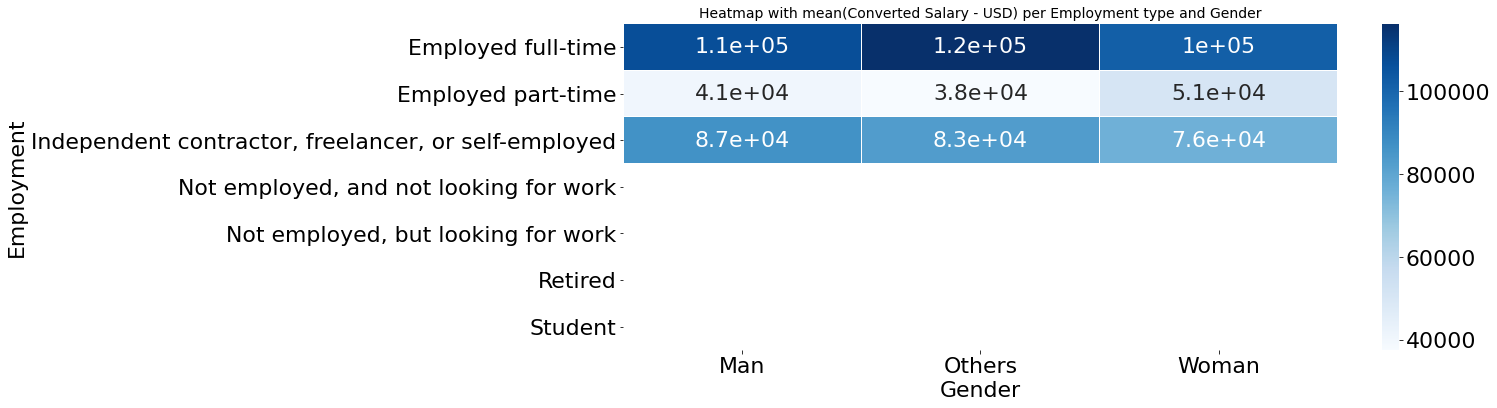

In [46]:
# We plot the info
plot_heatmap_mean(df, 'Employment', 'Gender','ConvertedComp', "Blues", "Heatmap with mean(Converted Salary - USD) per Employment type and Gender")

And what about the type of Employment, size of the company and Salary?

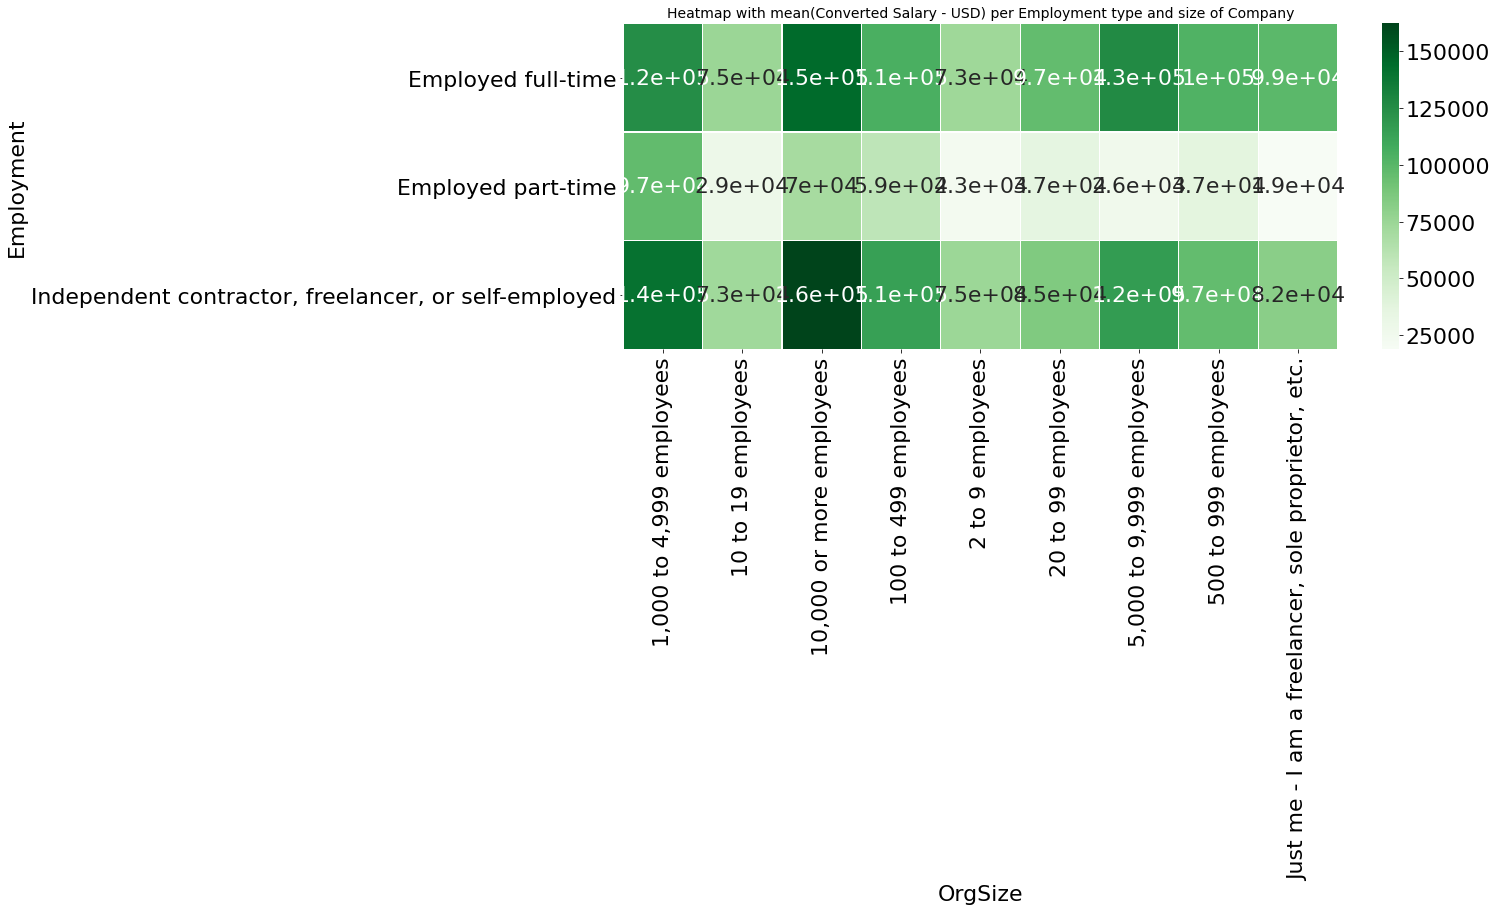

In [47]:
# We call the same function "plot_heatmap_mean" with the employment type, the size of the company and the salary
plot_heatmap_mean(df,'Employment', 'OrgSize','ConvertedComp', "Greens", "Heatmap with mean(Converted Salary - USD) per Employment type and size of Company")

And what about the Job Satisfaction, Gender and Salary?

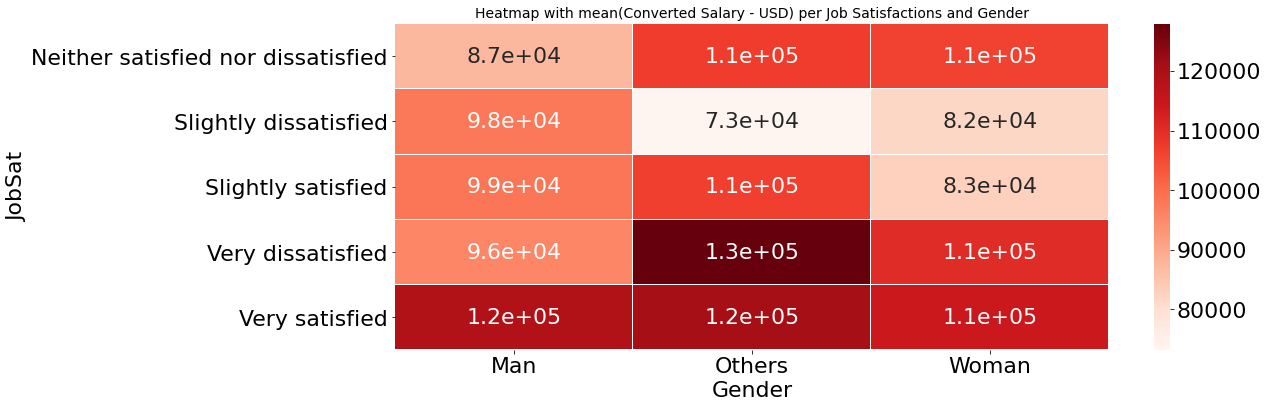

In [48]:
# And following with the same procedure, we generate a heatmap graphic showing the JobSatisfaction, Gender and Salary
plot_heatmap_mean(df,'JobSat', 'Gender','ConvertedComp', "Reds", "Heatmap with mean(Converted Salary - USD) per Job Satisfactions and Gender")

And now right to the last and more funny question:

# Q5. How well can we predict an individual's job salary? What aspects correlate well to job salary?

Let's check all the missing data on our dataset

In [49]:
# checking missing data in stack data 
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_stackoverflow_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_stackoverflow_data

,Total,Percent
ConvertedComp,29705,46.082127
CompTotal,29635,45.973534
NEWPurchaseResearch,27140,42.102977
PurchaseWhat,25097,38.933619
WebframeDesireNextYear,24437,37.909744
...,...,...
Employment,607,0.941655
Country,389,0.603466
MainBranch,299,0.463846
Hobbyist,45,0.069810


We are going to predict the Salary, so we are not interested in null fields of this feature. Let's fill them with the mean value

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [51]:
ml = df

In [52]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [53]:
def impute_nan_Values(df):
    """ All the missing values of the ConvertedComp column will 
    be replaced by the mean of the values of that column.
    """
    # Search every column
    for col in df.columns:
        values = df[col].values
        stat_value = 0
        if col is 'ConvertedComp':
            # If column is numerical: get mean of all values
            stat_value = values[~np.isnan(values)].mean()

            # Fill missing values with statistical value
            df[col].fillna(stat_value, inplace=True)

In [54]:
# Impute missing (NaN) values
impute_nan_Values(ml)

In [55]:
# We prepare a dataframe with the Salaries above 0
ml = df[df.ConvertedComp > 0]
ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34614 entries, 7 to 64154
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    34614 non-null  int64  
 1   MainBranch                    34614 non-null  object 
 2   Hobbyist                      34614 non-null  object 
 3   Age                           30508 non-null  float64
 4   Age1stCode                    34531 non-null  object 
 5   CompFreq                      34614 non-null  object 
 6   CompTotal                     34614 non-null  float64
 7   ConvertedComp                 34614 non-null  float64
 8   Country                       34614 non-null  object 
 9   CurrencyDesc                  34614 non-null  object 
 10  CurrencySymbol                34614 non-null  object 
 11  DatabaseDesireNextYear        26415 non-null  object 
 12  DatabaseWorkedWith            29648 non-null  object 
 13  D

In [56]:
# Now we analyze the Operating Systems information
ml.OpSys.describe()

count       33113
unique          4
top       Windows
freq        14815
Name: OpSys, dtype: object

For the categorical variable MainBranch there are two possible values, so let's convert them to numerical:
If value="I am not primarily a developer, but I write code sometimes as part of my work": 0
If value = "I am a developer by profession":1

In [57]:
# There are two distinct categories: Professional Developer or not
ml.MainBranch.describe()

count                              34614
unique                                 2
top       I am a developer by profession
freq                               31452
Name: MainBranch, dtype: object

In [58]:
# We translate this categorical information to numerical (0/1)
mainbranch_dict = {"I am a developer by profession":1,
"I am not primarily a developer, but I write code sometimes as part of my work": 0
                  }
ml['MainBranch'] = df.MainBranch.map(mainbranch_dict)

In [59]:
# Let's see how this Dataframe is
ml['MainBranch'].describe()

count    34614.000000
mean         0.908650
std          0.288111
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: MainBranch, dtype: float64

For the categorical variable Hobbyist there are two possible values, so let's convert them to numerical:
If value="No": 0
If value = "Yes":1

In [60]:
# now let's analyze the Hobbyist field
ml.Hobbyist

7        Yes
9        Yes
10       Yes
11        No
12       Yes
        ... 
64142    Yes
64148    Yes
64152    Yes
64153    Yes
64154    Yes
Name: Hobbyist, Length: 34614, dtype: object

In [61]:
# We translate from Yes/No to numerical info
hobbyist_dict = {"No":0,
"Yes": 1
}

ml['Hobbyist'] = df.Hobbyist.map(hobbyist_dict)

In [62]:
# Now let's see how it is this field
ml.Hobbyist.describe()

count    34614.000000
mean         0.768013
std          0.422107
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Hobbyist, dtype: float64

In [63]:
# And go to the next field: OpSys, that contains the information about Operative Systems
ml["OpSys"].describe()

count       33113
unique          4
top       Windows
freq        14815
Name: OpSys, dtype: object

In [64]:
# Let's translate from Operative Systems to numerical info (0-1-2-3)
OpSys_dict = {"Windows":1,
"Linux-based": 2,
"MacOS":3,
"NaN":0
              
}

ml['OpSys'] = df.OpSys.map(OpSys_dict)

Let's see some categories that could be influencers of Salary... for instance Education Level...

In [65]:
# Let's go to the next: Edlevel, we can see there are 9 distinct values
ml.EdLevel.describe()

count                                            34055
unique                                               9
top       Bachelor’s degree (B.A., B.S., B.Eng., etc.)
freq                                             16807
Name: EdLevel, dtype: object

We can see there are only 9 different possibilities, let's prepare them ...

This is a categorical variable and we are going to convert it to a numerical value using this logic:

"Bachelor’s degree (B.A., B.S., B.Eng., etc.)": 3,
"Some college/university study without earning a degree": 4,
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": 5,
"Associate degree (A.A., A.S., etc.)": 6,
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": 2
"Professional degree (JD, MD, etc.)": 7,
"Other doctoral degree (Ph.D, Ed.D., etc.)": 8,
"nan": np.nan,
"Primary/elementary school": 1",
"I never completed any formal education": 0}


In [66]:
# Let's translate from Education Level to numerical info
education_dict = {"Bachelor’s degree (B.A., B.S., B.Eng., etc.)": 3,
"Some college/university study without earning a degree": 4,
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": 5,
"Associate degree (A.A., A.S., etc.)": 6,
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": 2,
"Professional degree (JD, MD, etc.)": 7,
"Other doctoral degree (Ph.D, Ed.D., etc.)": 8,
"nan": np.nan,
"Primary/elementary school": 1,
"I never completed any formal education": 0}

ml['EdLevel'] = df.EdLevel.map(education_dict)

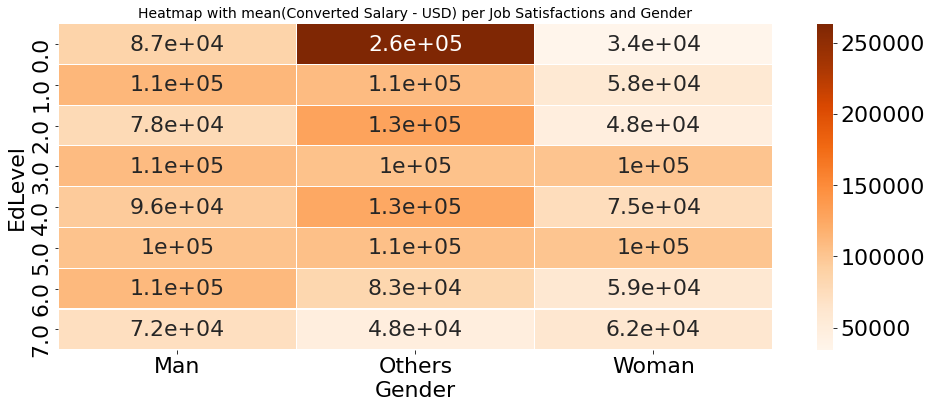

In [67]:
# And let's plot the info with a visual heatmap
plot_heatmap_mean(ml,'EdLevel', 'Gender','ConvertedComp', "Oranges", "Heatmap with mean(Converted Salary - USD) per Job Satisfactions and Gender")

Strange what happen with the ones with no Studies/None and have the maximum salaries...
As it seems to be an outlier, we will drop them out

In [68]:
# Let's see how it is the ConvertedComp field
ml.ConvertedComp.describe()

count    3.461400e+04
mean     1.041817e+05
std      2.272527e+05
min      1.000000e+00
25%      2.505600e+04
50%      5.404900e+04
75%      9.500000e+04
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [69]:
# Let's save the Salaries greater than 0 within a Dataframe (those less than 0 are not interesting for us)
ml = ml[ml.ConvertedComp > 0]
ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34614 entries, 7 to 64154
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    34614 non-null  int64  
 1   MainBranch                    34614 non-null  float64
 2   Hobbyist                      34614 non-null  float64
 3   Age                           30508 non-null  float64
 4   Age1stCode                    34531 non-null  object 
 5   CompFreq                      34614 non-null  object 
 6   CompTotal                     34614 non-null  float64
 7   ConvertedComp                 34614 non-null  float64
 8   Country                       34614 non-null  object 
 9   CurrencyDesc                  34614 non-null  object 
 10  CurrencySymbol                34614 non-null  object 
 11  DatabaseDesireNextYear        26415 non-null  object 
 12  DatabaseWorkedWith            29648 non-null  object 
 13  D

In [70]:
# Let's count the ocurrences
ml.Country.value_counts()

United States        8123
India                2624
United Kingdom       2580
Germany              2311
Canada               1342
                     ... 
Yemen                   1
Turkmenistan            1
Brunei Darussalam       1
Belize                  1
Grenada                 1
Name: Country, Length: 159, dtype: int64

In [71]:
# We reduce categories
def shorten_categories(categories, cutoff):
    '''
    INPUT:
    categories - Column name 
    cutoff     - Value to cutoff the category
        
    OUTPUT: Dataframe with the cutoff values
    
    '''  

    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [72]:
# We check the number of occurrences
ml.Country.value_counts()

United States        8123
India                2624
United Kingdom       2580
Germany              2311
Canada               1342
                     ... 
Yemen                   1
Turkmenistan            1
Brunei Darussalam       1
Belize                  1
Grenada                 1
Name: Country, Length: 159, dtype: int64

In [73]:
# Reduce categories
country_map = shorten_categories(ml.Country.value_counts(), 400)
ml['Country_Shorter'] = ml.Country.map(country_map)
ml.Country_Shorter.value_counts()/df.shape[0]

Other             0.160702
United States     0.126014
India             0.040707
United Kingdom    0.040024
Germany           0.035851
Canada            0.020819
Brazil            0.017918
France            0.017452
Netherlands       0.012550
Poland            0.012364
Australia         0.011945
Spain             0.011806
Italy             0.010316
Russia            0.009525
Sweden            0.008982
Name: Country_Shorter, dtype: float64

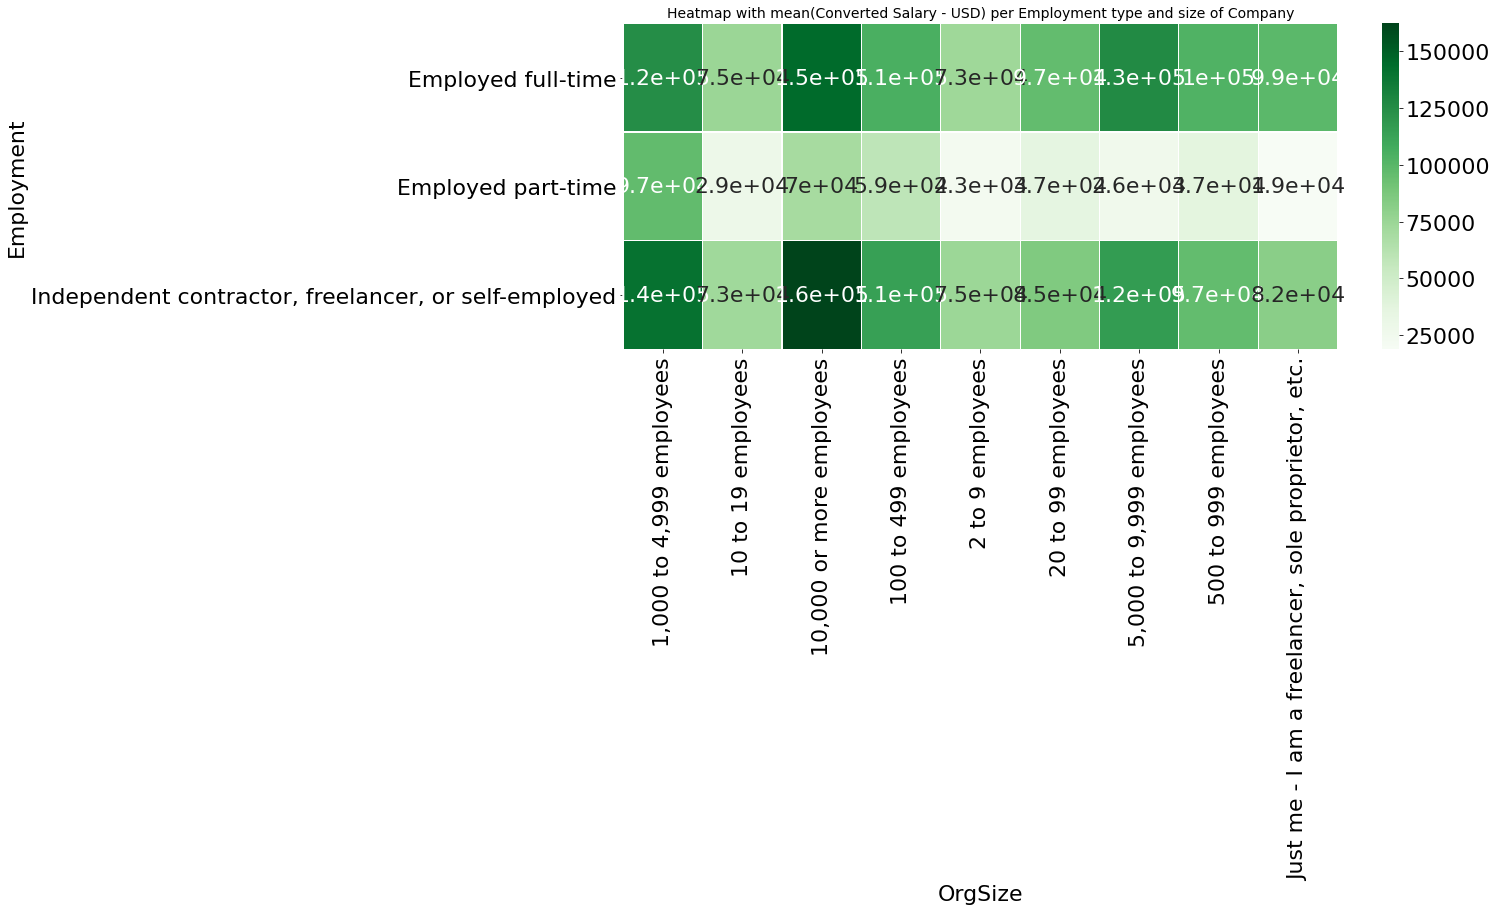

In [74]:
# Let's plot a heatmap to have an overview of the type of Employment, size of the company and Salary
plot_heatmap_mean(df,'Employment', 'OrgSize','ConvertedComp', "Greens", "Heatmap with mean(Converted Salary - USD) per Employment type and size of Company")

In [75]:
# Now let's encode Company Size, from string to number
compsize = {"Just me - I am a freelancer, sole proprietor, etc.": 1,
                    "2 to 9 employees": 2,
                    "10 to 19 employees": 3,
                    "20 to 99 employees": 4,
                    "100 to 499 employees": 5,
                    "500 to 999 employees": 6,
                    "1,000 to 4,999 employees": 7,
                    "5,000 to 9,999 employees": 8,
                    "10,000 or more employees": 9
}
ml['OrgSize'] = df.OrgSize.map(compsize)

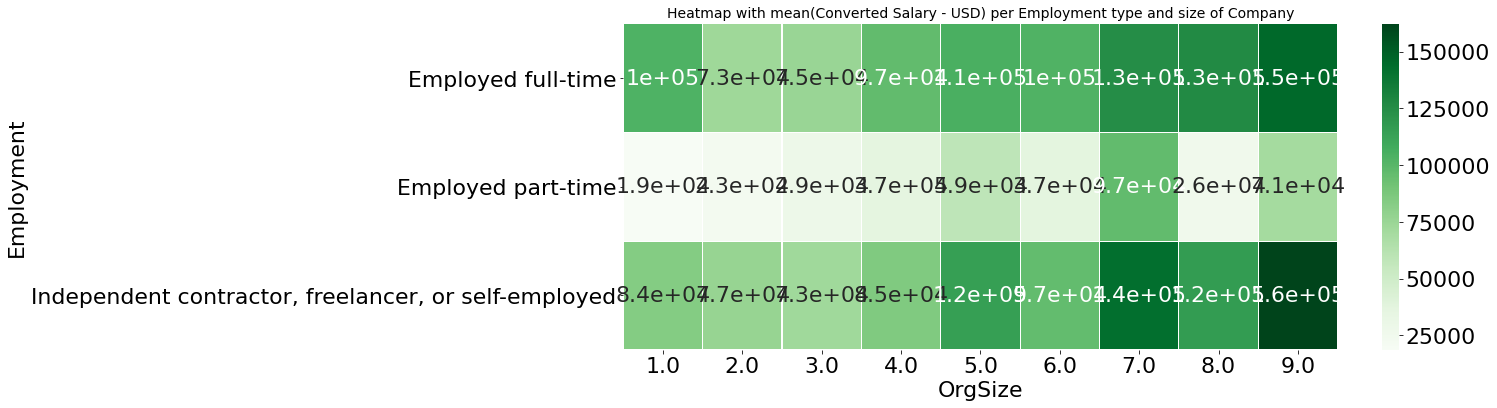

In [76]:
# And we visualize with a heatmap
plot_heatmap_mean(ml,'Employment', 'OrgSize','ConvertedComp', "Greens", "Heatmap with mean(Converted Salary - USD) per Employment type and size of Company")

In [77]:
# Let's check OrgSize field
ml['OrgSize'].describe()

count    34083.000000
mean         5.150984
std          2.265030
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: OrgSize, dtype: float64

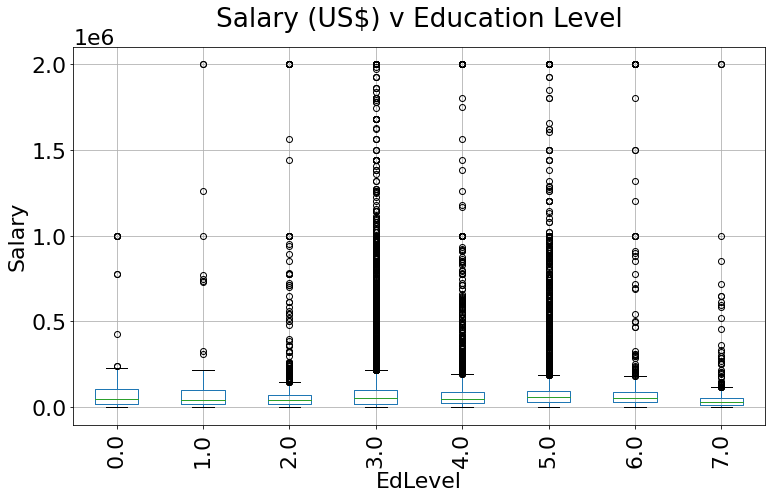

In [78]:
# Now let's plot a boxplot with the Salary versus Education Level information to see better outliers 
fig, ax = plt.subplots(1,1, figsize=(12, 7))
ml.boxplot('ConvertedComp', 'EdLevel', ax=ax)
plt.suptitle('Salary (US$) v Education Level')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90);

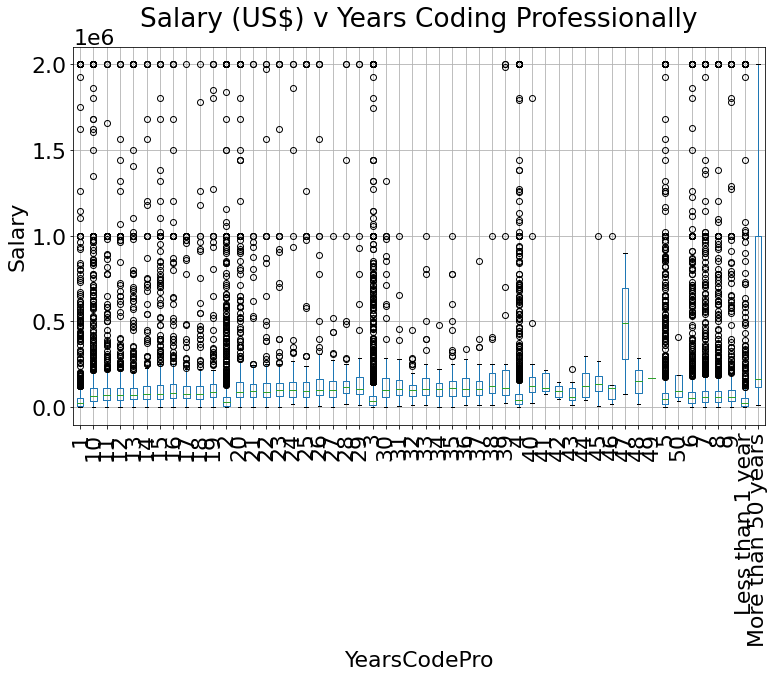

In [79]:
# Now let's plot the Salary versus the Years coding professionally
fig, ax = plt.subplots(1,1, figsize=(12, 7))
ml.boxplot('ConvertedComp', 'YearsCodePro', ax=ax)
plt.suptitle('Salary (US$) v Years Coding Professionally')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90);

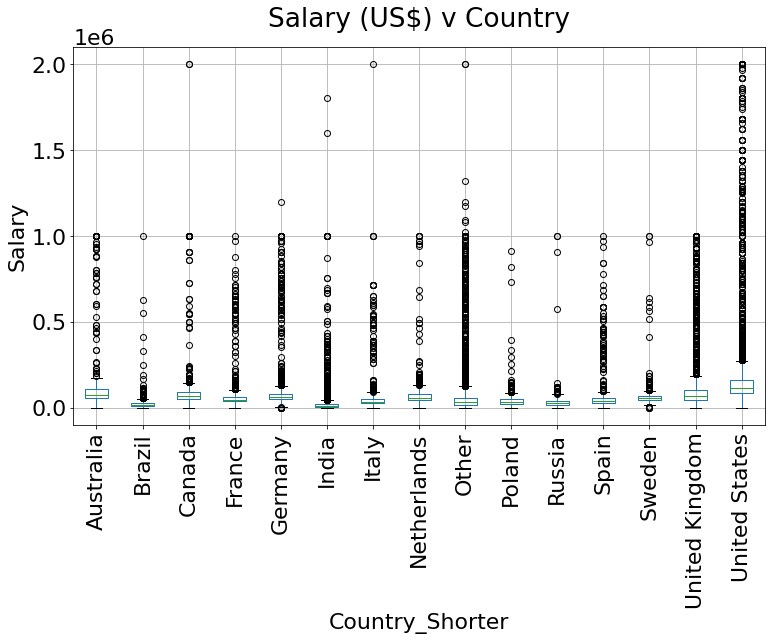

In [80]:
# Another plot to see salary versus Country, we can see outliers and differences between countries
fig, ax = plt.subplots(1,1, figsize=(12, 7))
ml.boxplot('ConvertedComp', 'Country_Shorter', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90);

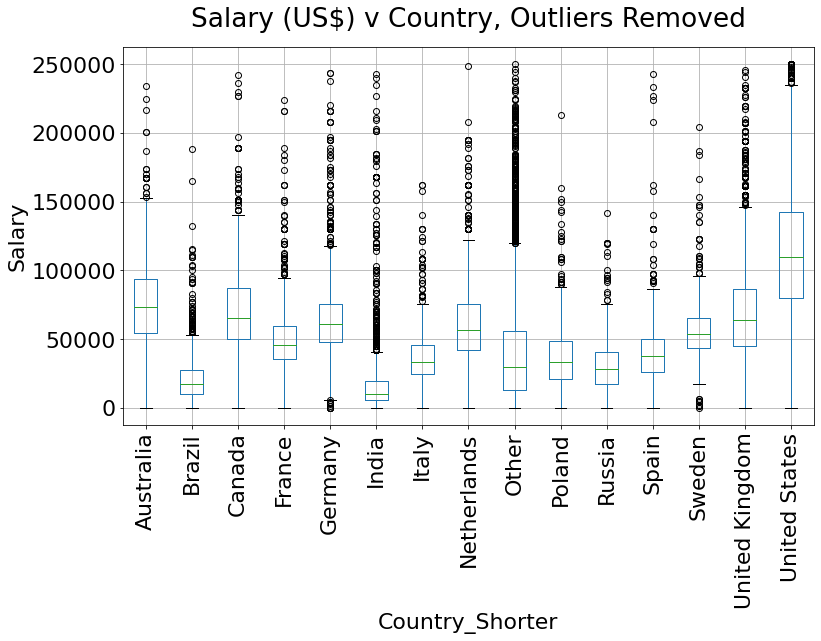

In [81]:
# And finally we plot salary versus country with outliers from Salary deleted
fig, ax = plt.subplots(1,1, figsize=(12, 7))
ml[ml.ConvertedComp<= 250000].boxplot('ConvertedComp', 'Country_Shorter', ax=ax)
plt.suptitle('Salary (US$) v Country, Outliers Removed')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90);

# 4. Data Modeling

In [82]:
# Let's remember ml dataframe schema
ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34614 entries, 7 to 64154
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    34614 non-null  int64  
 1   MainBranch                    34614 non-null  float64
 2   Hobbyist                      34614 non-null  float64
 3   Age                           30508 non-null  float64
 4   Age1stCode                    34531 non-null  object 
 5   CompFreq                      34614 non-null  object 
 6   CompTotal                     34614 non-null  float64
 7   ConvertedComp                 34614 non-null  float64
 8   Country                       34614 non-null  object 
 9   CurrencyDesc                  34614 non-null  object 
 10  CurrencySymbol                34614 non-null  object 
 11  DatabaseDesireNextYear        26415 non-null  object 
 12  DatabaseWorkedWith            29648 non-null  object 
 13  D

In [156]:
# We make a copy, take the outliers (>250K),little countries and USA salaries out, because they alter the mean
my_ml2 = ml.copy()
my_ml2 = my_ml2[(my_ml2.ConvertedComp <= 250000) & (my_ml2.Country_Shorter != 'Other') & (my_ml2.Country_Shorter != 'United States')]
del(my_ml2['Country_Shorter'])
#my_ml2.info()

In [155]:
# we keep these fields to make the prediction
my_ml3 = my_ml2[['Hobbyist','Age', 'Country', 'DevType', 'EdLevel', 'Employment', 'Gender','OpSys','OrgSize','YearsCodePro', 'ConvertedComp']]

In [132]:
# we include only the numerical variables
numeric_vars= my_ml3.select_dtypes(include=['int','float']).columns
numeric_vars

Index(['Hobbyist', 'Age', 'EdLevel', 'OpSys', 'OrgSize', 'ConvertedComp'], dtype='object')

In [133]:
# we fill the null with the mean
for num in numeric_vars:
    my_ml3[num] = my_ml3[num].fillna(my_ml3[num].mean())

In [134]:
# Now we get the categorical fields and dummy them
categorical_cols = my_ml3.select_dtypes(include=['object']).copy().columns
for catcols in categorical_cols:
    my_ml3 = pd.concat([my_ml3.drop(catcols, axis=1), pd.get_dummies(my_ml3[catcols], prefix=catcols, prefix_sep='_', drop_first=True)], axis=1)

In [135]:
# We make another check with the null values
my_ml3.dropna(how = 'any', subset = ['ConvertedComp'], axis = 0, inplace = True)
my_ml3['ConvertedComp'].isnull().sum();

In [136]:
my_ml3.shape

(32800, 6104)

In [137]:
my_ml3.describe()

,Hobbyist,Age,EdLevel,OpSys,OrgSize,ConvertedComp,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Chile,Country_China,Country_Colombia,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic Republic of the Congo,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Grenada,Country_Guatemala,Country_Guinea,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hong Kong,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Isle of Man,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Korea,Country_Kosovo,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Malta,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Nomadic,Country_Norway,Country_Oman,Country_Pakistan,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Moldova,Country_Romania,Country_Russia,Country_Rwanda,Country_Saint Vincent and the Grenadines,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan,Country_Thailand,Country_The former Yugoslav Republic of Macedonia,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United Republic of Tanzania,Country_United States,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,DevType_Academic researcher;Data or business analyst,DevType_Academic researcher;Data or business analyst;Data scientist or machine learning specialist,DevType_Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer,"DevType_Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Educator;Engineer, data;Engineer, site reliability;Engineering manager;Marketing or sales professional;Product manager;Scientist;Senior executive/VP;System administrator","DevType_Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Deve

In [138]:
# we prepare the categorical fields
cats_lst = my_ml3.select_dtypes(include = ['object']).columns.tolist()
for col in cats_lst:
    my_ml3 = pd.concat([my_ml3.drop(col, axis=1), pd.get_dummies(my_ml3[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)

In [139]:
# We separate the features and the field we are going to predict (Salary=ConvertedComp)
X = my_ml3.drop(['ConvertedComp'], axis = 1)
y = my_ml3 ['ConvertedComp']

In [140]:
# We calculate the best proportion of data for the test
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test


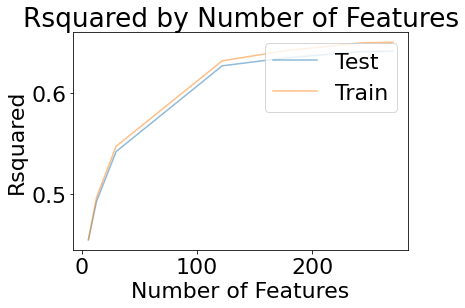

In [141]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [142]:
# Function to calculate the most important features in order to predict
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
83,Country_United States,78865.866568,78865.866568
74,Country_Switzerland,67220.744379,67220.744379
41,Country_Israel,62159.772301,62159.772301
23,Country_Denmark,53495.434102,53495.434102
36,Country_Iceland,50396.640423,50396.640423
256,YearsCodePro_33,46799.331440,46799.331440
261,YearsCodePro_38,45905.046874,45905.046874
57,Country_Norway,44756.274248,44756.274248
34,Country_Hong Kong,43820.293185,43820.293185
253,YearsCodePro_30,42920.719780,42920.719780


In [143]:
# We split data between train and test
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.25)

In [144]:
# we check one split
xtest

,Hobbyist,Age,EdLevel,OpSys,OrgSize,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Chile,Country_China,Country_Colombia,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic Republic of the Congo,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Grenada,Country_Guatemala,Country_Guinea,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hong Kong,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Isle of Man,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Korea,Country_Kosovo,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Malta,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Nomadic,Country_Norway,Country_Oman,Country_Pakistan,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Moldova,Country_Romania,Country_Russia,Country_Rwanda,Country_Saint Vincent and the Grenadines,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan,Country_Thailand,Country_The former Yugoslav Republic of Macedonia,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United Republic of Tanzania,Country_United States,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,DevType_Academic researcher;Data or business analyst,DevType_Academic researcher;Data or business analyst;Data scientist or machine learning specialist,DevType_Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer,"DevType_Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Educator;Engineer, data;Engineer, site reliability;Engineering manager;Marketing or sales professional;Product manager;Scientist;Senior executive/VP;System administrator","DevType_Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or

In [145]:
# Now we call the Linear Regression method 
lm_model = LinearRegression(normalize=True) # Instantiate

In [146]:
# And we fit our data to the model
lm_model.fit(X_train, y_train) #Fit

LinearRegression(normalize=True)

In [147]:
# And finally we test the model with the test dataset
y_test_preds = lm_model.predict(X_test) 

In [148]:
# And calculate the r-squared score to see how our model works
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.6413106366183015 on 9840 values.'

6. Evaluation

In [149]:
# Let's perform a test
# We use as a base the first row of the previous X_test and make them some changes...
sample_predict = X_test[0:1]
sample_predict['Age']=44.0
sample_predict['EdLevel']=5.0
sample_predict['OpSys']=3.0
sample_predict['OrgSize']=7.0
sample_predict['Country_Canada']=0.0
sample_predict['Country_Spain']=1.0
sample_predict['DevType_Data or business analyst;Data scientist or machine learning specialist']=1.0
sample_predict['YearsCodePro_Less than 1 year']=0.0
sample_predict['YearsCodePro_15']=1.0

# Now the moment of truth...or not...
predict_salary =  lm_model.predict(sample_predict)[0]

print("The model predicts the salary of this programmer is %.2f" % predict_salary)

The model predicts the salary of this programmer is 156768.12


In [150]:
# Let's perform another test
sample_predict['Age']=55.0
sample_predict['EdLevel']=5.0
sample_predict['OpSys']=3.0
sample_predict['OrgSize']=7.0
sample_predict['Country_Canada']=0.0
sample_predict['Country_Spain']=1.0
sample_predict['DevType_Data or business analyst;Data scientist or machine learning specialist']=0.0
sample_predict['DevType_Developer, back-end;Engineer, data']=1.0
sample_predict['YearsCodePro_Less than 1 year']=0.0
sample_predict['YearsCodePro_15']=1.0
#sample_predict

predict_salary =  lm_model.predict(sample_predict)[0]
#predict_salary[0]

print("The model predicts the salary of this programmer is %.2f" % predict_salary)

The model predicts the salary of this programmer is 163709.35


7. References

1. Stack Overflow Annual Developer Survey Raw Data: https://insights.stackoverflow.com/survey?_ga=2.52923681.882490167.1607859830-1551736371.1607859830
2. Stack Overflow 2020 Survey Insights: https://insights.stackoverflow.com/survey/2020?_ga=2.52923681.882490167.1607859830-1551736371.1607859830
3. My BlogPost explaining everything about this work:         